# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Ryan Shaw

https://github.com/DrPuffs/Bonus-Final-Project


Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [2]:
import requests
import pickle
from bs4 import BeautifulSoup
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from collections import Counter
import matplotlib.pyplot as plt

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

article_page = requests.get('https://www.fantasybookreview.co.uk/top-100-fantasy-books/')
filename = 'Top 100 Fantasy Books'

f = open(filename, 'wb')
pickle.dump(article_page, f)
f.close()

2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [3]:
with open(filename, 'rb') as f:
    article_html = pickle.load(f)
    
soup = BeautifulSoup(article_html.content, 'html5lib')

article_element = soup.find("div", {"id":"main"}).get_text()

doc = nlp(article_element)
sentiment = doc._.blob.polarity

sent_count = 0
for x in doc.sents:
    sent_count += 1
    

print(f'Polarity Score: {sentiment}')
print(f'Number of Sentences: {sent_count}')



Polarity Score: 0.22845993839060208
Number of Sentences: 527


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [4]:
def proper_tokens(token):
    return not (token.is_space or token.is_punct or token.is_stop)

tocs = [token for token in doc if proper_tokens(token)]
words = Counter(map(str, tocs))
most_common = words.most_common(5)

print(words.most_common(5))

print(f'The five most common tokens are: {most_common[0][0]}, {most_common[1][0]}, {most_common[2][0]}, {most_common[3][0]}, and {most_common[4][0]}.')
print(f'Their frequencies are in order as follows: {most_common[0][1]}, {most_common[1][1]}, {most_common[2][1]}, {most_common[3][1]}, and {most_common[4][1]}.')

[('Published', 100), ('Buy', 100), ('Amazon', 100), ('book', 75), ('Fantasy', 71)]
The five most common tokens are: Published, Buy, Amazon, book, and Fantasy.
Their frequencies are in order as follows: 100, 100, 100, 75, and 71.


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [34]:
lemmas = [token.lemma_ for token in doc if proper_tokens(token)]
words = Counter(map(str, lemmas))
most_lemmas = words.most_common(5)

print(most_lemmas)
print(f'The five most common lemmas are: {most_lemmas[0][0]}, {most_lemmas[1][0]}, {most_lemmas[2][0]}, {most_lemmas[3][0]}, and {most_lemmas[4][0]}.')
print(f'Their frequencies are in order as follows: {most_lemmas[0][1]}, {most_lemmas[1][1]}, {most_lemmas[2][1]}, {most_lemmas[3][1]}, and {most_lemmas[4][1]}.')

[('book', 109), ('publish', 105), ('buy', 101), ('Amazon', 100), ('Fantasy', 71)]
The five most common lemmas are: book, publish, buy, Amazon, and Fantasy.
Their frequencies are in order as follows: 109, 105, 101, 100, and 71.


5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

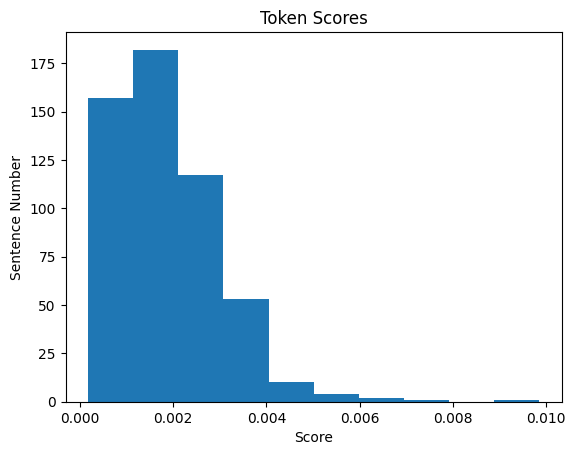

In [35]:
sentences = list(doc.sents)
token_scores = []

def score_sentence_by_token(sentence, interesting_token):
    count_a = 0
    count_b = 0
    
    for i in interesting_token:
        for j in sentence:
            if j == i:
                count_a += 1
        count_b += 1

    return (count_a/count_b)

for x in sentences:
    token_scores.append(score_sentence_by_token(x,tocs))
    
plt.hist(token_scores)
plt.title("Token Scores")
plt.xlabel("Score")
plt.ylabel("Sentence Number")
plt.show()

#Between 0.001 and 0.002.



6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

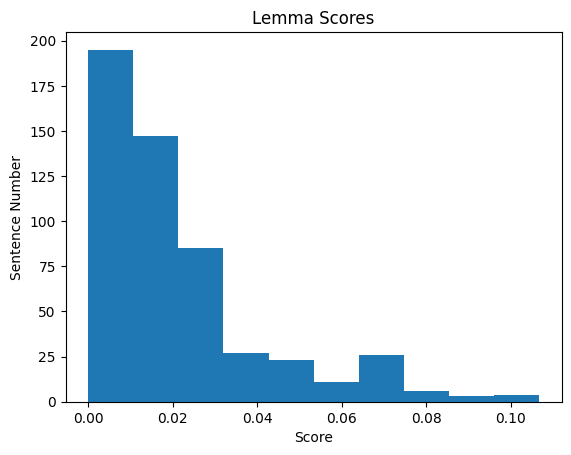

In [36]:
lemma_scores = []

def score_sentence_by_lemma(sentence, interesting_lemmas):
    count_y = 0
    count_z = 0


    for i in interesting_lemmas:
        for j in sentence:
            if j.text == i:
                count_y += 1
        count_z += 1

    return (count_y/count_z)

for x in sentences:
    lemma_scores.append(score_sentence_by_lemma(x,lemmas))
    
plt.hist(lemma_scores)
plt.title("Lemma Scores")
plt.xlabel("Score")
plt.ylabel("Sentence Number")
plt.show()

# Between 0 and 0.01

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 0.006
* Cutoff Score (lemmas): 0.09

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [20]:
tok_summary = []
cutoff_score = 0.006

for x in sentences:
    score = score_sentence_by_token(x,tocs)
    if score > cutoff_score:
        tok_summary.append(x.text)
print(' '.join(tok_summary))

At times horrific, beautiful, tragic, comic and even uplifting, with a plot which takes unexpected turns and twists and revelations, one of the most unique settings imaginable and above all a style of dark poetry that is truly exceptional.
Published: 2000 | World Fantasy Award Nominee: 2005 (The Iron Council), 2003 (The Scar), 2001 (Perdido Street Station) Harry Potter and the Philosopher's Stone by JK Rowling (Harry Potter)
Nestlé Smarties Book Prize Winner: 1999 (Harry Potter and the Prisoner of Azkaban), 1998 (Harry Potter and the Chamber of Secrets), 1997 (Harry Potter and the Philosopher's Stone)The seven Harry Potter books are very well-written and laugh-out-loud funny, and it makes for an intoxicating combination. James and the Giant Peach by Roald Dahl
World Fantasy Award for Lifetime Achievement: 1983When Dahl made up James and the Giant Peach as a bedtime story for his daughters Olivia and Tessa, little could he have know that half a century later millions of parents would ha

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [38]:
summary_sum = 0

docu = nlp(' '.join(tok_summary))
polarity_score = docu._.blob.polarity

for x in tok_summary:
    summary_sum += 1

print(f'Polarity Score: {polarity_score}')    
print(f'Number of Sentences: {summary_sum}')

Polarity Score: 0.2322804632190915
Number of Sentences: 118


10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [31]:
lem_summary = []
cutoff_score = 0.09

for x in sentences:
    score = score_sentence_by_lemma(x,lemmas)
    if score > cutoff_score:
        lem_summary.append(x.text)
print(' '.join(lem_summary))

Published: 2004 | World Fantasy Award Winner: 2005 | British Fantasy Award Nominee: 2005


Buy on Amazon


5. Published: 2006 | World Fantasy Award Nominee: 2007 | British Fantasy Award Nominee: 2007


Buy on Amazon


7. Published: 2001 | World Fantasy Award Nominee: 2002 | British Fantasy Award Nominee: 2002


Buy on Amazon


8. Magician by Raymond E Feist (Riftwar Saga)
Feist's Magician is one of the best known and well read fantasy books; it is a powerful and memorable book that any reader who derives pleasure from reading epic fantasy should read being classic fantasy imbued with many elements of originality.  James and the Giant Peach by Roald Dahl
World Fantasy Award for Lifetime Achievement: 1983When Dahl made up James and the Giant Peach as a bedtime story for his daughters Olivia and Tessa, little could he have know that half a century later millions of parents would have read exactly the same story to their own children; a book that fully deserves the accolade of children’s c

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [39]:
summary_sum = 0

docu = nlp(' '.join(lem_summary))
polarity_score = docu._.blob.polarity

for x in lem_summary:
    summary_sum += 1

print(f'Polarity Score: {polarity_score}')    
print(f'Number of Sentences: {summary_sum}')

Polarity Score: 0.16995614035087722
Number of Sentences: 6


12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell. 

Original Polarity Score: 0.22845993839060208
Token Polarity Score: 0.13259775171065497
Lemma Polarity Score: 0.16995614035087722

The difference is easy to see when looking at the Token vs Lemma polarity summaries. In the Token summary, you can see several negative words being used like: "tragic", "horrific", and "dark". While in the Lemma summary, you have: "powerful", "pleasure", and "memorable". For the original article, it is less clear without reading through the whole thing. However, I believe that the Lemma summary scores lower simply due to the fact that the majority of the summary is made up of numbers, publish dates, award information, and telling the reader to buy on Amazon. There is probably some cleaning that needs done to exclude some of these.

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

Neither is great and need additional filtering. However, I think that the Lemma summary is organized better and does a better job of showing the original article format and what the original article was all about.